<a href="https://colab.research.google.com/github/Chirag050/Computer_Vision/blob/main/DLCV_PROJ_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Chirag Prasad
# 102322021

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np

# 1. Import and store data in appropriate variables
# This automatically downloads the data from the source and splits it
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

As the list of 50000 images is not all sorted initially itself, we run a loop where whenever the program encounters a new class number it prints the image associated in the order 0-9. Where the default class order is noted above for all the 10 classes in CIFAR-10. This helps us ensure we print a image for each class and that too in the correct order.

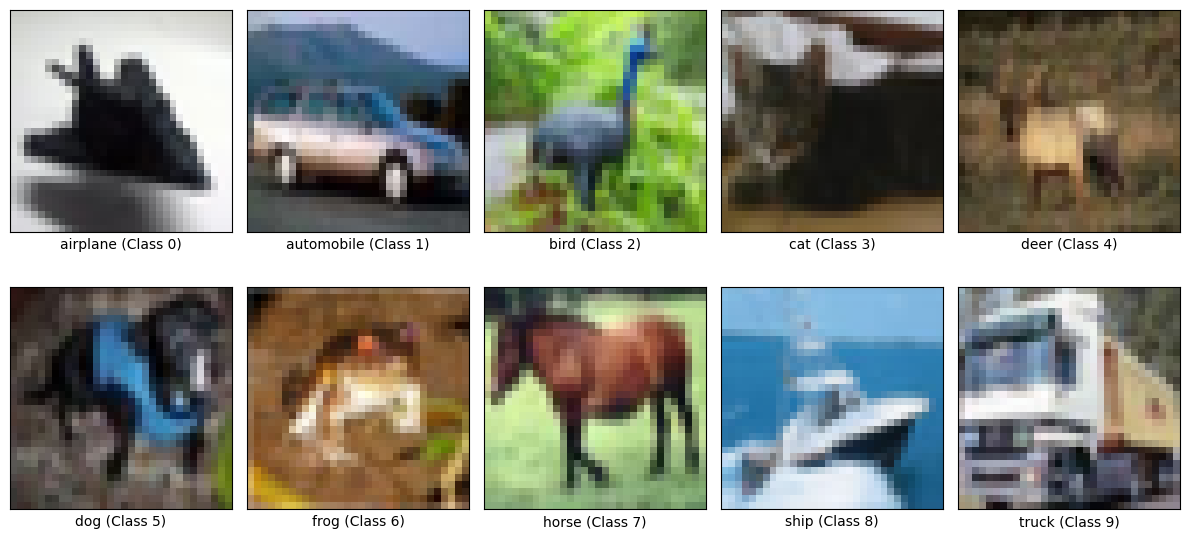

In [ ]:
# 2. Show a sample from the dataset
plt.figure(figsize=(12,6))

for i in range(10):
    # FIND the index of the first image that has the label 'i'
    # .flatten() ensures we are looking at a simple list of numbers
    specific_index = np.where(train_labels.flatten() == i)[0][0]

    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Use the 'specific_index' we just found
    plt.imshow(train_images[specific_index])

    # Now the image and the label will match perfectly
    plt.xlabel(f"{class_names[i]} (Class {i})")

plt.tight_layout()
plt.show()

Label ID at index 100: 8
Class Name: ship


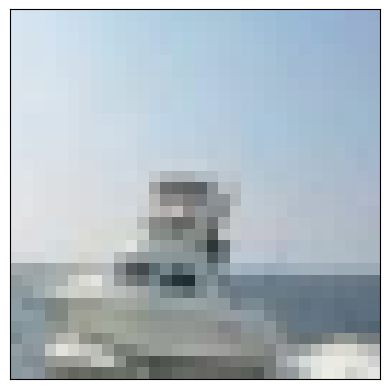

In [ ]:
# External feature to verify any random image in the list
# To check if the correct label is being shown with the image
idx = 100
print(f"Label ID at index {idx}: {train_labels[idx][0]}")
print(f"Class Name: {class_names[train_labels[idx][0]]}")
plt.imshow(train_images[idx])
plt.xticks([])
plt.yticks([])
plt.grid(False)

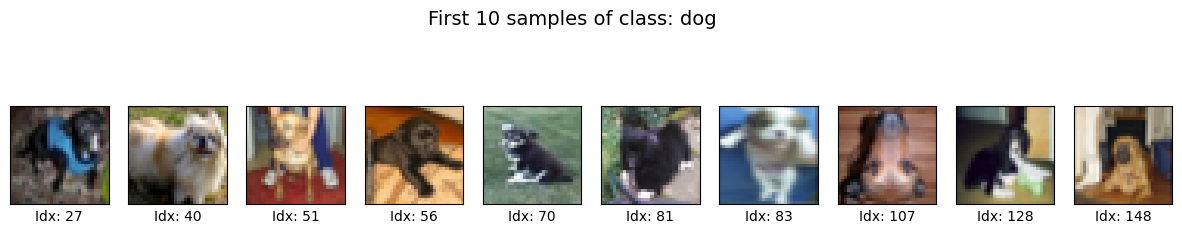

In [ ]:
# To print and verify N number of images from the desired class to verify the index number and dataset
# 1. Define your parameters
target_class_name = 'dog'
number_of_images = 10

# 2. Get the Class ID from the name
class_id = class_names.index(target_class_name)

# 3. Find all indices where the label matches our target
# Using flatten() to handle the (50000, 1) shape
all_matching_indices = np.where(train_labels.flatten() == class_id)[0]

# 4. Take only the number of images we want
selected_indices = all_matching_indices[:number_of_images]

# 5. Plotting logic
plt.figure(figsize=(15, 3))
for i, img_idx in enumerate(selected_indices):
    plt.subplot(1, number_of_images, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[img_idx])
    plt.xlabel(f"Idx: {img_idx}")

plt.suptitle(f"First {number_of_images} samples of class: {target_class_name}", fontsize=14)
plt.show()

In [ ]:
# 3. Print Dataset Information
print("--- Dataset Statistics ---")

# Shape and Size
print(f"Train Images Shape: {train_images.shape}") # (50000, 32, 32, 3)
print(f"Test Images Shape:  {test_images.shape}")  # (10000, 32, 32, 3)
print(f"Data Format/Type:   {train_images.dtype}")
print(f"Total Training Samples: {len(train_images)}")
print(f"Total Testing Samples:  {len(test_images)}")

# Count per class label
def count_labels(labels, set_name):
    print(f"\nSamples per class in {set_name}:")
    unique, counts = np.unique(labels, return_counts=True)
    for label, count in zip(unique, counts):
        print(f"  {class_names[label]}: {count}")

count_labels(train_labels, "Training Set")
count_labels(test_labels, "Testing Set")

--- Dataset Statistics ---
Train Images Shape: (50000, 32, 32, 3)
Test Images Shape:  (10000, 32, 32, 3)
Data Format/Type:   uint8
Total Training Samples: 50000
Total Testing Samples:  10000

Samples per class in Training Set:
  airplane: 5000
  automobile: 5000
  bird: 5000
  cat: 5000
  deer: 5000
  dog: 5000
  frog: 5000
  horse: 5000
  ship: 5000
  truck: 5000

Samples per class in Testing Set:
  airplane: 1000
  automobile: 1000
  bird: 1000
  cat: 1000
  deer: 1000
  dog: 1000
  frog: 1000
  horse: 1000
  ship: 1000
  truck: 1000


The images are actually a 4D array of data where it is (N,W,H,C) {number of channels, widht, height, and colour channels}
Each image is a $32 \times 32$ grid. However, because it is in color, each point on that grid contains three numbers (R,G, B). So, one single image is actually $32 \times 32 \times 3 = 3,072$ individual numerical values.
